# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #07</span>

All'interno della settima esercitazione abbiamo trattato due macroargomenti:

1. Analisi sistematica e quantitativa dell'efficienza del metodo a blocchi;
2. Simulazione di meccanica statistica dell'insieme canonico (**NVT**) tramite metodi Monte Carlo.

Per svolgere entrambi i punti di questa esercitazione ci è stato fornito un codice di partenza in grado di realizzare l'insieme canonico della Meccanica Statistica con simulazioni stocastiche di tipo Monte Carlo. Le varie configurazioni sono state infatti prodotte tramite l'algoritmo di Metropolis con matrice di trasferimento uniforme, campionando i pesi statistici di Boltzmann. Nello specifico, il sistema microscopico preso in considerazione per svolgere l'esercitazione, seguiva il modello di Lennard-Jones ed era caratterizzato da condizioni di periodicità al contorno (**PBC**). Il codice era inoltre in grado di misurare i valori istantanei e medi (tramite metodo a blocchi) di energia potenziale e pressione, tenendo conto anche dei rispettivi termini di coda ($i.e.$ i contributi additivi per $r>r_{cut}$).

$$\frac{\langle V \rangle _{tail}}{N} = 8\pi \left( \frac{\rho}{\sigma^3} \right) \epsilon \left[ \frac{1}{9} \left( \frac{\sigma}{r_c} \right)^9 - \frac{1}{3} \left( \frac{\sigma}{r_c} \right)^3 \right]$$

$$\frac{\langle W \rangle _{tail}}{3N \epsilon} = 32\pi \left( \frac{\rho}{\sigma^3} \right) \epsilon \left[ \frac{1}{9} \left( \frac{\sigma}{r_c} \right)^9 - \frac{1}{6} \left( \frac{\sigma}{r_c} \right)^3 \right]$$

dove $\rho$ e $N$ rappresentano rispettivamente la densità di particelle per unità di volume e il numero totale di particelle all'interno del box di simulazione, mentre $\sigma$ e $\epsilon$ sono i parametri caratteristici del potenziale di Lennard-Jones.

### <span style="color:darkorange"> Esercizio 07.1</span>

Il primo esercizio consisteva, per l'appunto, in uno studio approfondito dell'efficienza del metodo a blocchi. In particolare, utilizzando il codice NVT, abbiamo simulato i tre stati della materia sotto le seguenti condizioni termodinamiche:

1. fase solida: $\rho = 1.1$, $T = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. fase liquida: $\rho = 0.8$, $T = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. fase gassosa: $\rho = 0.05$, $T = 1.2$ (raggio di cut-off: $r_c = 5.0$)

<font color="blue">**N.B.**</font> le grandezze riportate sopra sono scritte in unità di Lennard-Jones.

Una volta raggiunta la condizione d'equilibrio, ottenuta monitorando l'andamento dell'energia potenziale in funzione del numero di step, ho eseguito una simulazione costituita da $M = 10^5$ step Monte Carlo, fissando il valore della lunghezza dello step di transizione in modo da ottenere un'accettazione dell'algoritmo di Metropolis di circa il 50%. Da questa simulazione ho quindi estratto un campione di misure eseguite in successione di energia potenziale per unità di particella $U/N$ e pressione $P$. I dati raccolti mi hanno infine permesso di condurre un analisi sistematica del funzionamento del metodo a blocchi. In particolare, per ognuna delle tre simulazioni e per entrambe le grandezze termodinamiche prese in considerazione, ho dovuto stimare:

- l'andamento dell'**Autocorrelazione** in funzione del tempo di simulazione tra un dato e il successivo;
- l'andamento dell'**Errore Statistico** in funzione del numero di dati all'interno di ogni blocco.

L'autocorrelazione è stata ottenuta tramite la seguente formula:

$$Ac_{[x]}(t) = \frac{\langle x (t')x(t' + t) \rangle _{t'} - \langle x \rangle ^2}{\sigma_x^2}$$

Durante la lezione 6 abbiamo inoltre visto come tale grandezza tenda a crollare esponenzialmente per grandi tempi.

$$Ac_{[x]}(t) \approx \exp{ \left( -\frac{t}{t_c} \right) }$$

dove $t_c$ è il tempo di correlazione oltre il quale è possibile, con buona approssimazione, considerare le misure come indipendenti l'una dall'altra. Nello specchietto di Python sottostante sono riportati gli andamenti dell'autocorrelazione relativi alla fase solida.

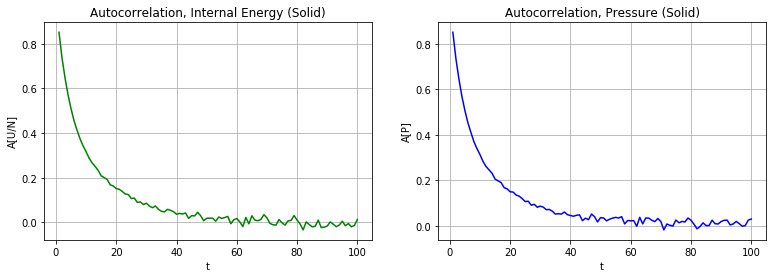

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x,U_acorr = np.loadtxt("Esercizio7.1/Solid/acorr_epot.out", usecols=(0,1), delimiter=' ', unpack='true')
x,P_acorr = np.loadtxt("Esercizio7.1/Solid/acorr_pres.out", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(x,U_acorr,color='g')
plt.xlabel('t')
plt.ylabel('A[U/N]')
plt.title('Autocorrelation, Internal Energy (Solid)')
plt.grid(True)
    
plt.subplot(132)
plt.plot(x,P_acorr,color='b')
plt.xlabel('t')
plt.ylabel('A[P]')
plt.title('Autocorrelation, Pressure (Solid)')
plt.grid(True)

plt.show()

Come si osserva dai plot, il trend dell'autocorrelazione è ben approssimato, almeno per tempi relativamente piccoli ($t < 30$), da un andamento di tipo esponenziale come quello predetto sopra. Vediamo in particolare come, al crescere di $t$, le autocorrelazioni calcolate tendano ad avvicinarsi sempre più a zero anche se non in modo regolare, bensì fluttuando intorno a tale valore. Ciò chiaramente, descrive una tendenza delle misure a scorrelarsi all'aumentare del tempo di simulazione.

Successivamente, ho calcolato, sempre per lo stato solido, l'andamento dell'errore statistico in funzione del numero di dati utilizzati per ogni blocco, $i.e.$ $L=N_{tot}/N_{blk}$. I risultati ottenuti sono riportati di seguito.

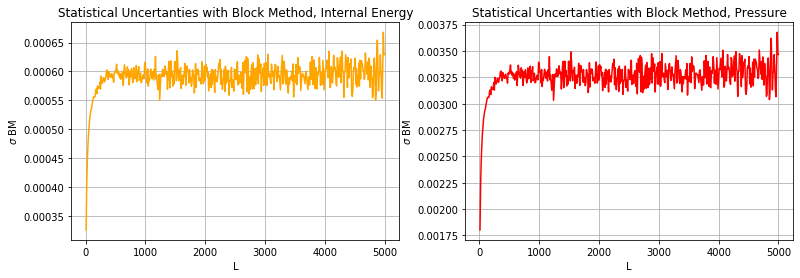

In [3]:
x,U_err = np.loadtxt("Esercizio7.1/Solid/err_epot.out", usecols=(0,1), delimiter=' ', unpack='true')
x,P_err = np.loadtxt("Esercizio7.1/Solid/err_pres.out", usecols=(0,1), delimiter=' ', unpack='true')
    
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(x,U_err,color='orange')
plt.xlabel('L')
plt.ylabel('$\sigma$ BM')
plt.title('Statistical Uncertanties with Block Method, Internal Energy')
plt.grid(True)

plt.subplot(132)
plt.plot(x,P_err,color='r')
plt.xlabel('L')
plt.ylabel('$\sigma$ BM')
plt.title('Statistical Uncertanties with Block Method, Pressure')
plt.grid(True)

plt.show()

Come abbiamo visto a lezione, l'incertezza statistica calcolata tramite BM tende, almeno inizialmente, a crescere, di conseguenza mi aspetto che, limitando il numero di dati per blocco a valori troppo piccoli, si rischi di sottostimare l'errore. Tuttavia, dai due grafici, vediamo come, per valori di $L$ sufficientemente grandi, l'incertezza saturi a un valore costante, finendo per fluttuare intorno ad esso. Questo comportamento ci permette quindi di dedurre quale sia, fissato il numero totale di dati a disposizione, il numero di blocchi sufficiente a garantire il corretto funzionamento del metodo a blocchi all'interno della simulazione.

Di seguito ho riportato i risultati ottenuti simulando il sistema nella fase liquida.

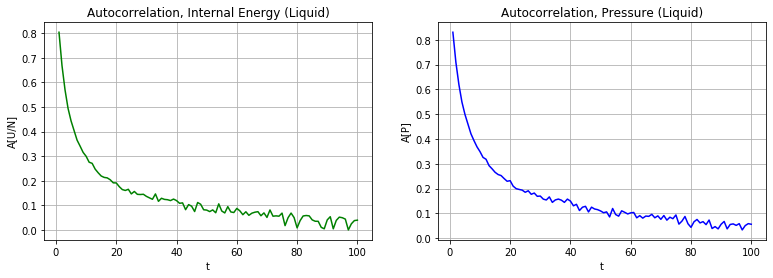

In [4]:
x,U_acorr = np.loadtxt("Esercizio7.1/Liquid/acorr_epot.out", usecols=(0,1), delimiter=' ', unpack='true')
x,P_acorr = np.loadtxt("Esercizio7.1/Liquid/acorr_pres.out", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(x,U_acorr,color='g')
plt.xlabel('t')
plt.ylabel('A[U/N]')
plt.title('Autocorrelation, Internal Energy (Liquid)')
plt.grid(True)
    
plt.subplot(132)
plt.plot(x,P_acorr,color='b')
plt.xlabel('t')
plt.ylabel('A[P]')
plt.title('Autocorrelation, Pressure (Liquid)')
plt.grid(True)

plt.show()

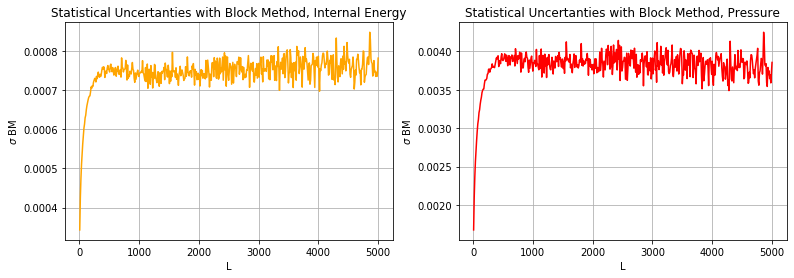

In [5]:
x,U_err = np.loadtxt("Esercizio7.1/Liquid/err_epot.out", usecols=(0,1), delimiter=' ', unpack='true')
x,P_err = np.loadtxt("Esercizio7.1/Liquid/err_pres.out", usecols=(0,1), delimiter=' ', unpack='true')
    
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(x,U_err,color='orange')
plt.xlabel('L')
plt.ylabel('$\sigma$ BM')
plt.title('Statistical Uncertanties with Block Method, Internal Energy')
plt.grid(True)

plt.subplot(132)
plt.plot(x,P_err,color='r')
plt.xlabel('L')
plt.ylabel('$\sigma$ BM')
plt.title('Statistical Uncertanties with Block Method, Pressure')
plt.grid(True)

plt.show()

I risultati ottenuti appaiono pressocchè identici a quelli precedentemente discussi per lo stato solido.

Il pannello sottostante riporta l'andamento dell'autocorrelazione associata alla fase gassosa.

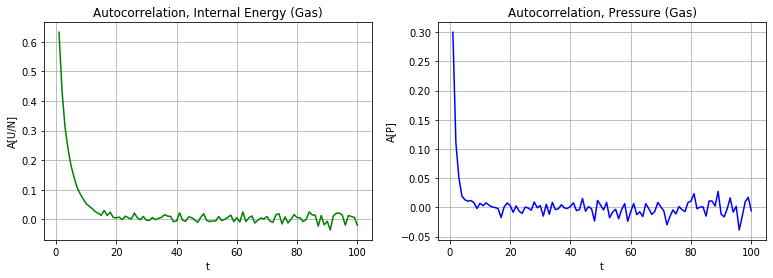

In [6]:
x,U_acorr = np.loadtxt("Esercizio7.1/Gas/acorr_epot.out", usecols=(0,1), delimiter=' ', unpack='true')
x,P_acorr = np.loadtxt("Esercizio7.1/Gas/acorr_pres.out", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(x,U_acorr,color='g')
plt.xlabel('t')
plt.ylabel('A[U/N]')
plt.title('Autocorrelation, Internal Energy (Gas)')
plt.grid(True)
    
plt.subplot(132)
plt.plot(x,P_acorr,color='b')
plt.xlabel('t')
plt.ylabel('A[P]')
plt.title('Autocorrelation, Pressure (Gas)')
plt.grid(True)

plt.show()

Già ad occhio, si può notare la tendenza del tempo di correlazione ad essere molto più piccolo rispetto ai due casi precedenti. Ciò è dovuto fondamentalmente al fatto che lo stato gassoso, tra i 3, è quello che più si avvicina alla condizione di gas ideale, caratterizzato, come sappiamo, da una distribuzione delle particelle perfettamente randomica. In virtù di questa similitudine, la simulazione della fase gassosa ci porta ad avere configurazioni che tendono a scorrelarsi molto velocemente nel tempo, come effettivamente osservato dai plot sopra riportati.

Di seguito sono invece rappresentati gli andamenti dell'errore statistico (BM) di energia potenziale e pressione, sempre relativi alla fase gassosa.

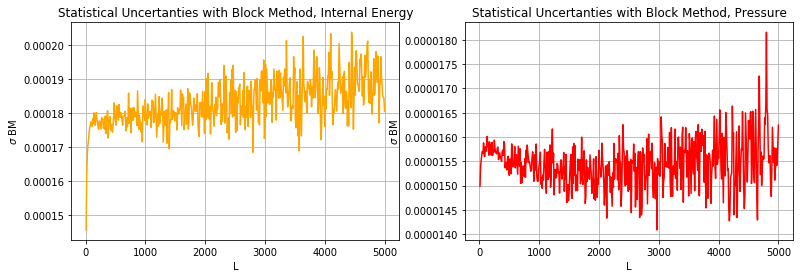

In [7]:
x,U_err = np.loadtxt("Esercizio7.1/Gas/err_epot.out", usecols=(0,1), delimiter=' ', unpack='true')
x,P_err = np.loadtxt("Esercizio7.1/Gas/err_pres.out", usecols=(0,1), delimiter=' ', unpack='true')
    
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(x,U_err,color='orange')
plt.xlabel('L')
plt.ylabel('$\sigma$ BM')
plt.title('Statistical Uncertanties with Block Method, Internal Energy')
plt.grid(True)

plt.subplot(132)
plt.plot(x,P_err,color='r')
plt.xlabel('L')
plt.ylabel('$\sigma$ BM')
plt.title('Statistical Uncertanties with Block Method, Pressure')
plt.grid(True)

plt.show()

Per la fase gassosa vediamo come, una volta raggiunta la condizione di saturazione dell'errore statistico calcolato tramite BM, esso tenda ad avere fluttuazioni relativamente molto grandi, specialmente per quanto riguarda la pressione.

### <span style="color:darkorange"> Esercizio 07.2 e Esercizio 07.3</span>

I due punti successivi dell'esercitazione consistevano in una modifica sia del codice fornito, che del codice scritto per svolgere l'esercitazione 4 (*Dinamica Molecolare NVE*). Nello specifico, in entrambi i casi, ho dovuto implementare il calcolo della funzione di distribuzione radiale $g(r)$ in funzione della distanza $r$ tra le particelle per $r \in \left[ 0; L/2\right]$, con $L$ dimensione lineare del box di simulazione. A lezione abbiamo visto come tale grandezza permetta di descrivere la probabilità di trovare una coppia di atomi a distanza $r$, in relazione alla probabilità attesa, per il medesimo evento, in un sistema caratterizzato da una distribuzione perfettamente randomica delle particelle (gas ideale). La qunatità $g(r)$ può essere calcolata tramite la seguente formula:

$$g(r) = \frac{1}{\rho N \Delta V (r)} \left \langle \sum_i \sum_{i \neq j = 1}^N \delta \left[ \mid \vec{r} \mid - \mid  \vec{r}_i - \vec{r}_j \mid \right] \right \rangle$$

dove $\rho$ e $N$ sono rispettivamente la densità di particelle per unità di volume e il numero totale di particelle all'interno del box di simulazione, mentre $\Delta V (r)$ rappresenta il volume del guscio sferico sotteso dalle due sfere di raggio $r$ e $r+dr$. Per implementare questo calcolo all'interno del mio codice ho costruito un istogramma, dividendo l'intervallo $\left[ 0; L/2\right]$ in $100$ bin, e ho contato (**2 volte**) il numero di coppie di particelle la cui distanza relativa $r$ cadeva esattamente all'interno di uno di questi sottointervalli. In questo modo, scalando ogni bin con il correto prefattore $\frac{1}{\rho N \Delta V (r)}$, ho ottenuto una stima istantanea dell'andamento di $g(r)$. Questi dati sono poi stati utilizzati per calcolare i rispettivi valori medi accompagnati da incertezze statistiche, tramite il consueto metodo a blocchi.

### <span style="color:darkorange"> Esercizio 07.4</span>

All'interno del quarto esercizio ho dovuto utilizzare il codice NVT per simulare i tre stati della materia dell'**Argon** ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) sotto le seguenti condizioni:

1. fase solida: $\rho = 1.1$, $T = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. fase liquida: $\rho = 0.8$, $T = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. fase gassosa: $\rho = 0.05$, $T = 1.2$ (raggio di cut-off: $r_c = 5.0$)

<font color="blue">**N.B.**</font> le grandezze riportate sopra sono scritte in unità di Lennard-Jones.

Ognuna di queste simulazioni consisteva, prima di tutto, nel raggiungimento della condizione d'equilibrio e nel settaggio dello step di transizione dell'algoritmo di Metropolis in modo da ottenere una probabilità di accettazione di circa il 50%. A questo punto, ho simulato un numero di step Monte Carlo pari a $10^5$, misurando di volta in volta i valori istantanei di energia potenziale per unità di particella $U/N$ e pressione $P$, e, applicando il metodo a blocchi con $N_{blk}=100$, ho potuto stimare l'andamento dei loro valori medi, con rispettive incertezze statistiche, in funzione del numero di blocchi utilizzati all'interno della simulazione. Ho calcolato inoltre l'andamento di $g(r)$ utilizzando sia il codice NVT, sia il codice NVE, e ho confrontato i risultati ottenuti.

Di seguito sono riportati gli andamenti dei valori medi ed incertezza statistica di $U/N$ e $P$ (nel SI), ottenuti simulando la fase solida del sistema.

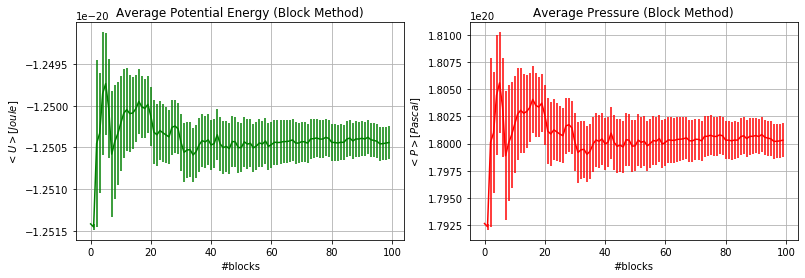

In [8]:
ave_U, err_U = np.loadtxt("Esercizio7.4/Solid/output.epot.0", usecols=(2,3), delimiter=' ', unpack='true')
ave_P, err_P = np.loadtxt("Esercizio7.4/Solid/output.pres.0", usecols=(2,3), delimiter=' ', unpack='true')

#parametri Argon
sigma = 0.34
e_kb = 120
kb = 1.380649*(10**-23)

#fattori di scala in SI
Tscale = e_kb
Escale = e_kb*kb
Pscale = (sigma**3)/(e_kb*kb)

n_blocks = 100
n = np.arange(n_blocks)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(n,ave_U*Escale,err_U*Escale,color='g')
plt.title('Average Potential Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<U> [Joule]$')
plt.grid(True)

plt.subplot(132)
plt.errorbar(n,ave_P*Pscale,err_P*Pscale,color='r')
plt.title('Average Pressure (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<P> [Pascal]$')
plt.grid(True)

plt.show()

Come si osserva dai plot sopra riportati, entrambe le medie calcolate con il Block Method convergono al risultato atteso dopo un numero relativamente piccolo di blocchi ($N_{blk} \geq 40$). Confrontando inoltre i valori appena ottenuti di energia potenziale per unità di particella $U/N$ e pressione $P$, con quelli ricavati dalla simulazione di dinamica molecolare NVE dell'esercitazione 4, possiamo notare come questi ultimi siano leggermente più grandi rispetto ai primi. Ciò è dovuto principalmente all'aggiunta dei termini di coda all'interno della simulazione NVT. Si verifica infatti facilmente che, i valori di $r_{cut}$ fissati per tutte e tre le simulazioni, producono termini di correzione negativi sia per $U/N$ che per $P$.

Nello specchietto di Python sottostante, è invece riportato il confronto tra gli andamenti di $g(r)$ ricavati per l'insieme microcanonico NVE (*Dinamica Molecolare*) e per l'insieme canonico NVT (*Monte Carlo*). In aggiunta, ho anche plottato il valore di $g(r)$ per un gas ideale, $i.e.$ $g_{ideal}(r)=1$.

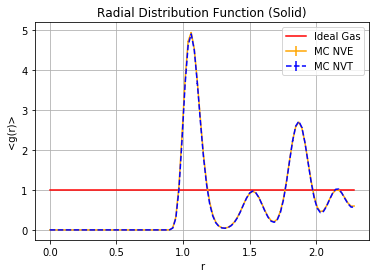

In [9]:
r,g_NVE,err_g_NVE = np.loadtxt("NVE/Solid/output.gave.0", usecols=(0,1,2), delimiter=' ', unpack='true')
r,g_NVT,err_g_NVT = np.loadtxt("Esercizio7.4/Solid/output.gave.0", usecols=(0,1,2), delimiter=' ', unpack='true')

g_ideal = np.zeros(100) + 1

plt.figure()
plt.errorbar(r,g_NVE,err_g_NVE,color='orange',label='MC NVE')
plt.title('Radial Distribution Function (Solid)')
plt.xlabel('r')
plt.ylabel('<g(r)>')
plt.errorbar(r,g_NVT,err_g_NVT,color='b',linestyle='dashed',label='MC NVT', linewidth=1.5)
plt.plot(r,g_ideal,color='r',label='Ideal Gas')
plt.grid(True)
plt.legend()

plt.show()

La prima e più importante osservazione che possiamo fare riguarda sicuramente il perfetto accordo tra i due andamenti ottenuti per NVT e NVE. Ciò è senza dubbio sorprendente, in quanto queste due simulazioni sono state condotte seguendo due metodologie diametralmente opposte: da un lato (NVE) ho simulato l'evoluzione nel tempo delle singole perticelle in modo deterministico, risolvendo le equazioni del moto di Hamilton, mentre nel secondo caso (NVT) ho applicato la Meccanica Statistica per studiare lo stato del sistema all'equilibrio, per fare ciò ho implementato il campionamento dei pesi di Boltzmann tramite tecniche Monte Carlo ($i.e.$ algoritmo di Metropolis). Il fatto che queste due curve coincidano, ci permette quindi di dimostrare esplicitamente la validità di una trattazione di tipo statistica per un sistema microscopico a molte particelle. Un altro aspetto degno di nota riguarda invece l'andamento della curva $g(r)$: nonostante questa quantità fluttui intorno a 1, vediamo che anche per distanze prossime a $L/2$, essa tenda a discostarsi anche di parecchio dall'andamento tipico di un gas ideale $g_{ideal}(r)=1$. Questo è dovuto al fatto che la configurazione microscopica associata alla fase solida appare molto diversa dallo stato di assoluto disordine tipico dei gas perfetti.

Di seguito sono riportati i risultati emersi dalla simulazione della fase liquida.

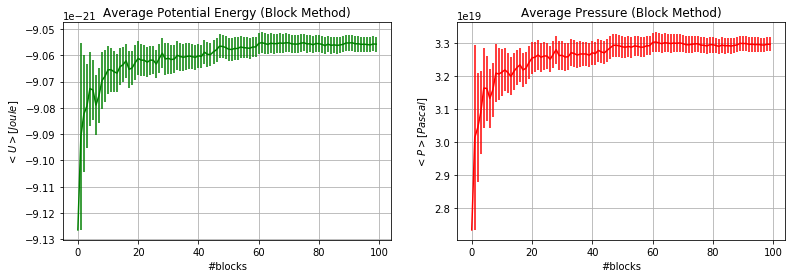

In [10]:
ave_U, err_U = np.loadtxt("Esercizio7.4/Liquid/output.epot.0", usecols=(2,3), delimiter=' ', unpack='true')
ave_P, err_P = np.loadtxt("Esercizio7.4/Liquid/output.pres.0", usecols=(2,3), delimiter=' ', unpack='true')

n_blocks = 100
n = np.arange(n_blocks)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(n,ave_U*Escale,err_U*Escale,color='g')
plt.title('Average Potential Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<U> [Joule]$')
plt.grid(True)

plt.subplot(132)
plt.errorbar(n,ave_P*Pscale,err_P*Pscale,color='r')
plt.title('Average Pressure (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<P> [Pascal]$')
plt.grid(True)

plt.show()

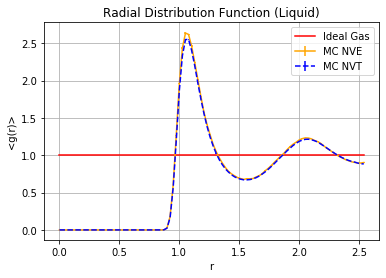

In [11]:
r,g_NVE,err_g_NVE = np.loadtxt("NVE/Liquid/output.gave.0", usecols=(0,1,2), delimiter=' ', unpack='true')
r,g_NVT,err_g_NVT = np.loadtxt("Esercizio7.4/Liquid/output.gave.0", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure()
plt.errorbar(r,g_NVE,err_g_NVE,color='orange',label='MC NVE')
plt.title('Radial Distribution Function (Liquid)')
plt.xlabel('r')
plt.ylabel('<g(r)>')
plt.errorbar(r,g_NVT,err_g_NVT,color='b',linestyle='dashed',label='MC NVT', linewidth=1.5)
plt.plot(r,g_ideal,color='r',label='Ideal Gas')
plt.grid(True)
plt.legend()

plt.show()

Anche in questo caso vediamo esserci perfetto accordo tra le due $g(r)$ ricavate con NVT e NVE. Possiamo inoltre notare come, per grandi $r$, le oscillazioni intorno a $g_{ideal}$ della funzione distribuzione radiale siano molto più piccole rispetto a quelle della simulazione precedente. Questo comportamento rispecchia il fatto che la fase liquida è più simile da un modello di gas perfetto, rispetto alla fase solida. Tuttavia, nonostante all'aumentare di $r$ la curva $g(r)$ si avvicini sempre più a 1, vediamo che allo stesso tempo le oscillazioni ad essa associate rimangono assolutamente non trascurabili, in quanto stiamo comunque simulando un sistema in fase liquida e quindi posto in uno stato legato, cioè caratterizzato da un'energia totale negativa, contrariamente a quanto accade in un gas perfetto.

Infine, ho riportato i risultati ottenuti simulando la fase gassosa.

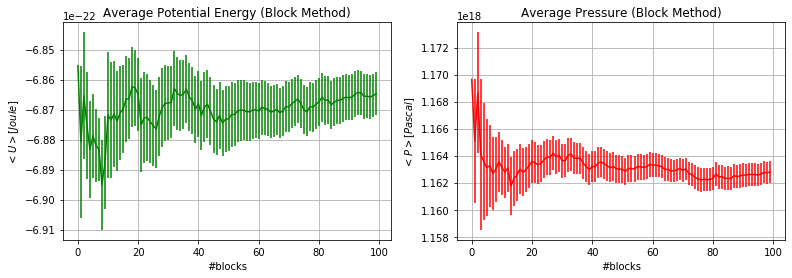

In [12]:
ave_U, err_U = np.loadtxt("Esercizio7.4/Gas/output.epot.0", usecols=(2,3), delimiter=' ', unpack='true')
ave_P, err_P = np.loadtxt("Esercizio7.4/Gas/output.pres.0", usecols=(2,3), delimiter=' ', unpack='true')

n_blocks = 100
n = np.arange(n_blocks)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(n,ave_U*Escale,err_U*Escale,color='g')
plt.title('Average Potential Energy (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<U> [Joule]$')
plt.grid(True)

plt.subplot(132)
plt.errorbar(n,ave_P*Pscale,err_P*Pscale,color='r')
plt.title('Average Pressure (Block Method)')
plt.xlabel('#blocks')
plt.ylabel('$<P> [Pascal]$')
plt.grid(True)

plt.show()

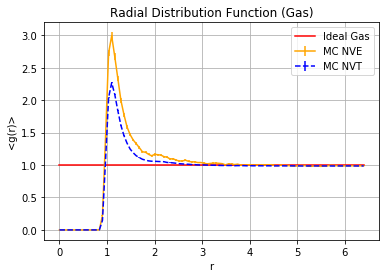

In [13]:
r,g_NVE,err_g_NVE = np.loadtxt("NVE/Gas/output.gave.0", usecols=(0,1,2), delimiter=' ', unpack='true')
r,g_NVT,err_g_NVT = np.loadtxt("Esercizio7.4/Gas/output.gave.0", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure()
plt.errorbar(r,g_NVE,err_g_NVE,color='orange',label='MC NVE')
plt.title('Radial Distribution Function (Gas)')
plt.xlabel('r')
plt.ylabel('<g(r)>')
plt.errorbar(r,g_NVT,err_g_NVT,color='b',linestyle='dashed',label='MC NVT', linewidth=1.5)
plt.plot(r,g_ideal,color='r',label='Ideal Gas')
plt.grid(True)
plt.legend()

plt.show()

Nuovamente possiamo corroborare la validità della Meccanica Statistica osservando il perfetto accordo tra le due curve ottenute. Vediamo inoltre come, questa volta, per grandi valori di $r$, la funzione $g(r)$ sia molto prossima a $g_{ideal}(r)=1$, presentando delle fluttuazioni sicuramente trascurabili rispetto alla scala presa in considerazione. Ciò è giustificato dal fatto che stiamo simulando un sistema in fase gassossa, ben modellizzato dalla teoria dei gas ideali per valori grandi di $r$.